# Packages

In [1]:
import os
import itertools
import numpy as np
import math as math
import pandas as pd 
import random as random
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from utils.Auxiliary import *

# Input


In [2]:
DataType = "BreastCancer"
BaseDirectory = "/Users/simondn/Documents/RashomonActiveLearning/Results/"
RandomForesResults = LoadAnalyzedData(DataType, BaseDirectory, "RandomForestClassification", 0.0)
AnalyzedData015 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.01)
AnalyzedData025 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.025)

# Run Time

In [3]:
### Time ###
print("DUREAL 0.015 Time (minutes): " + "Mean: " + str(round(np.mean(AnalyzedData015["Time_DUREAL"])/60,2)) + "| Max: " + str(round(np.max(AnalyzedData015["Time_DUREAL"])/60,2)))
print("UNREAL 0.015 Time (minutes): " + "Mean: " + str(round(np.mean(AnalyzedData015["Time_UNREAL"])/60,2)) + "| Max: " + str(round(np.max(AnalyzedData015["Time_UNREAL"])/60,2)))
print("DUREAL 0.025 Time (minutes): " + "Mean: " + str(round(np.mean(AnalyzedData025["Time_DUREAL"])/60,2)) + "| Max: " + str(round(np.max(AnalyzedData025["Time_DUREAL"])/60,2)))
print("UNREAL 0.025 Time (minutes): " + "Mean: " + str(round(np.mean(AnalyzedData025["Time_UNREAL"])/60,2)) + "| Max: " + str(round(np.max(AnalyzedData025["Time_UNREAL"])/60,2)))

DUREAL 0.015 Time (minutes): Mean: 10.23| Max: 31.05
UNREAL 0.015 Time (minutes): Mean: 10.28| Max: 30.93
DUREAL 0.025 Time (minutes): Mean: 419.51| Max: 717.49
UNREAL 0.025 Time (minutes): Mean: 416.67| Max: 708.27


# Error Vec

(<Figure size 700x600 with 1 Axes>, <Figure size 700x600 with 1 Axes>)

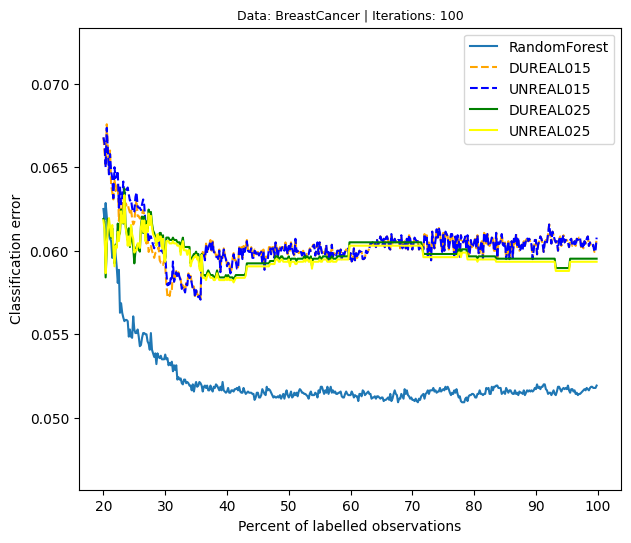

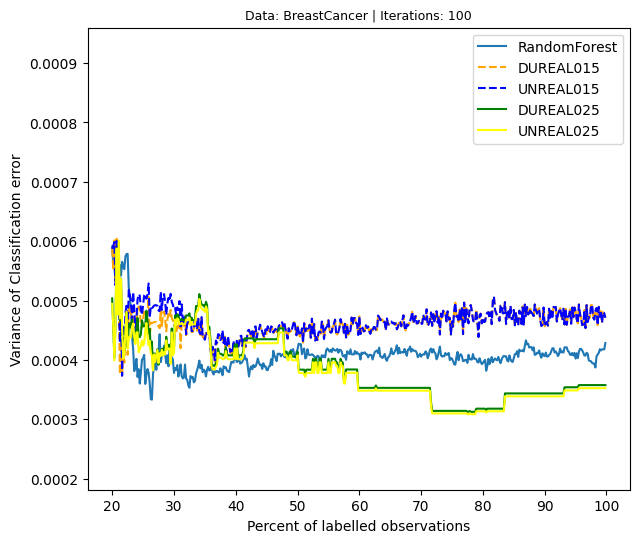

In [9]:
### Set Up ###
PlotSubtitle = f"Data: {DataType} | Iterations: {AnalyzedData015['Error_DUREAL'].shape[0]}"
colors = {
    "DUREAL015": "orange",
    "UNREAL015": "blue",
    "DUREAL025": "green",
    "UNREAL025": "yellow"
}

linestyles = {
    "DUREAL015": "dashed",
    "UNREAL015": "dashed",
    "DUREAL025": "solid",
    "UNREAL025": "solid"
}

### Figure ##
MeanVariancePlot(RelativeError = None,
                 RandomForest = RandomForesResults["Error_RF"],
                 DUREAL015 = AnalyzedData015["Error_DUREAL"],
                 UNREAL015 = AnalyzedData015["Error_UNREAL"],
                 DUREAL025 = AnalyzedData025["Error_DUREAL"],
                 UNREAL025 = AnalyzedData025["Error_UNREAL"],
                 Colors = colors,
                 Linestyles=linestyles,
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.00,
                 CriticalValue = 1.96)

---

# Selection History

In [5]:
from collections import Counter

In [6]:
from collections import Counter
import pandas as pd

### Input ###
M = 20
# FirstMIterationsRFL = RandomForesResults["SelectionHistory_RF"].iloc[:, 0:M].to_numpy().flatten()
FirstMIterationsUNREAL = AnalyzedData015["SelectionHistory_UNREAL"].iloc[:, 0:M].to_numpy().flatten()
FirstMIterationsDUREAL = AnalyzedData015["SelectionHistory_DUREAL"].iloc[:, 0:M].to_numpy().flatten()

### Counter ###
# Counter_RF = Counter(FirstMIterationsRFL)
Counter_UNREAL = Counter(FirstMIterationsUNREAL)
Counter_DUREAL = Counter(FirstMIterationsDUREAL)

### Convert Counter to DataFrame ###
# Counter_RF = pd.DataFrame.from_dict(Counter_RF, orient='index', columns=['RFL'])
Counter_UNREAL = pd.DataFrame.from_dict(Counter_UNREAL, orient='index', columns=['UNREAL'])
Counter_DUREAL = pd.DataFrame.from_dict(Counter_DUREAL, orient='index', columns=['DUREAL'])

### Combine DataFrames ###
CombinedCounter = pd.concat([ Counter_UNREAL, Counter_DUREAL], axis=1)
CombinedCounter = CombinedCounter.join(LoadData(DataType), how='left')


In [7]:
CombinedCounter

,UNREAL,DUREAL,ClumpThickness_10,CellSize_1,CellSize_10,CellShape_1,Adhesion_1,SingleEpithelialCellSize_2,BareNuclei_1,BareNuclei_10,NormalNucleoli_1,NormalNucleoli_10,Y
123,4.0,3,0,0,0,0,1,0,0,1,0,0,1
240,33.0,34,0,1,0,0,0,1,0,0,0,0,0
636,10.0,10,1,0,1,0,0,0,1,0,0,1,1
552,11.0,11,0,0,0,0,0,1,1,0,0,0,0
177,32.0,33,0,0,1,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,NaN,1,0,0,0,0,0,0,0,0,0,1,1
268,NaN,1,1,0,0,0,0,0,0,0,0,0,1
522,NaN,1,1,0,0,0,0,0,0,0,0,0,1
664,NaN,1,0,1,0,1,0,1,1,0,1,0,0
